<a href="https://colab.research.google.com/github/Celestin25/heart-disease-analysis/blob/main/Heart_disease_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# importations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

# Load the dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=columns)


# Display the first few rows of the dataset

In [3]:
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


# Basic statistics

In [4]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope      target  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

# Checking for missing values

In [5]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Visualizing the distribution of target variable

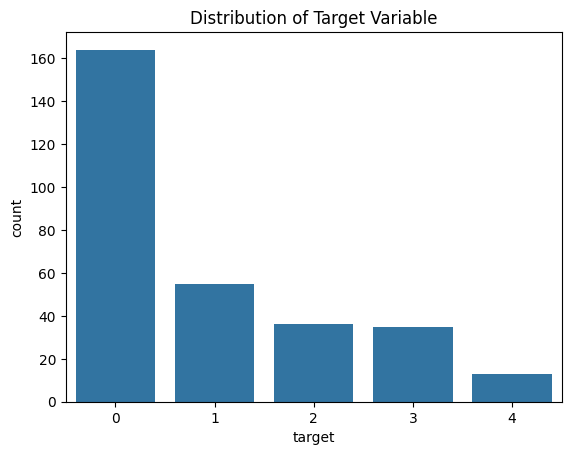

In [6]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualizing the distribution of numerical features

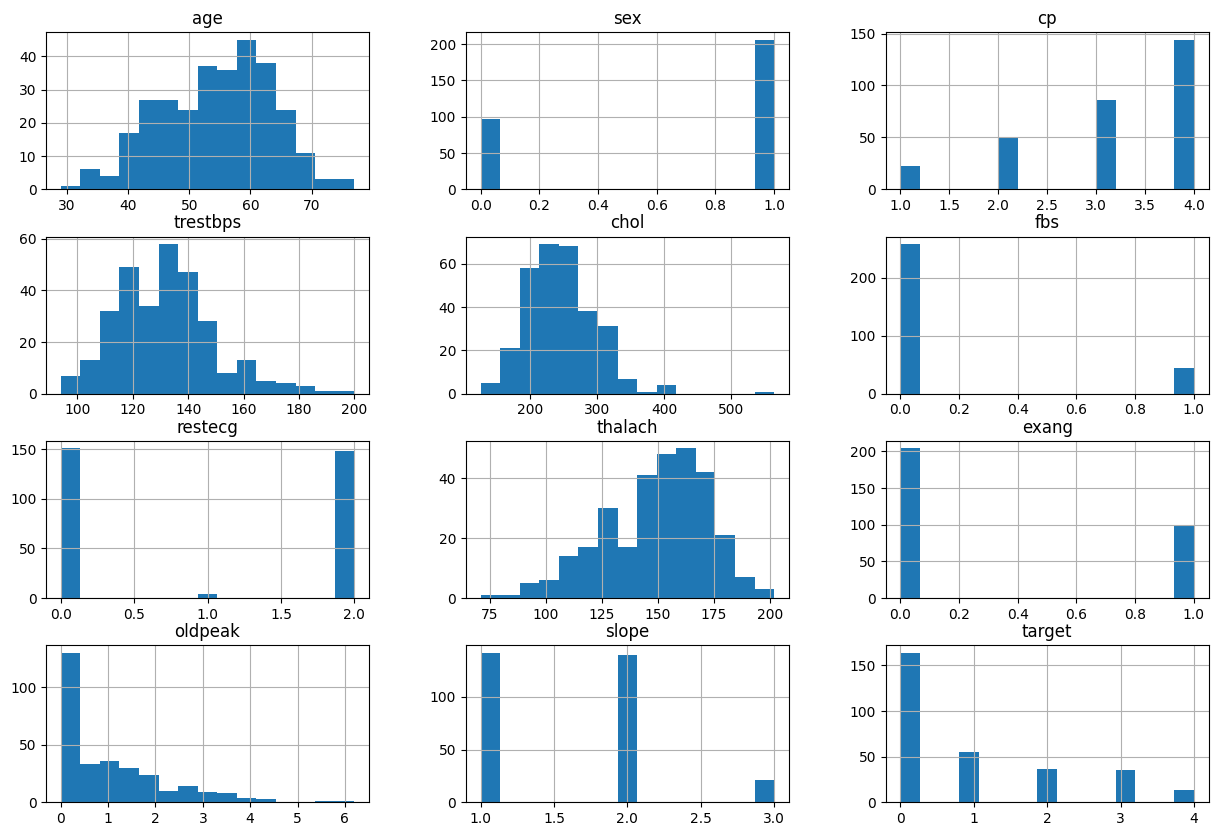

In [7]:
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Handle missing values by replacing .

In [8]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=columns)

# Separate features and target

In [9]:
X = df.drop('target', axis=1)

# Scaling the features

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final preprocessed dataframe

In [11]:
X_preprocessed = pd.DataFrame(X_scaled, columns=X.columns)

# K-means clustering

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Hierarchical clustering

In [13]:
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(X_preprocessed)

# DBSCAN clustering
# Adjust DBSCAN parameters

In [14]:
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_preprocessed)


# Check the unique labels

In [15]:
print("Unique labels from DBSCAN:", set(dbscan_labels))

Unique labels from DBSCAN: {-1}


# PCA visualization

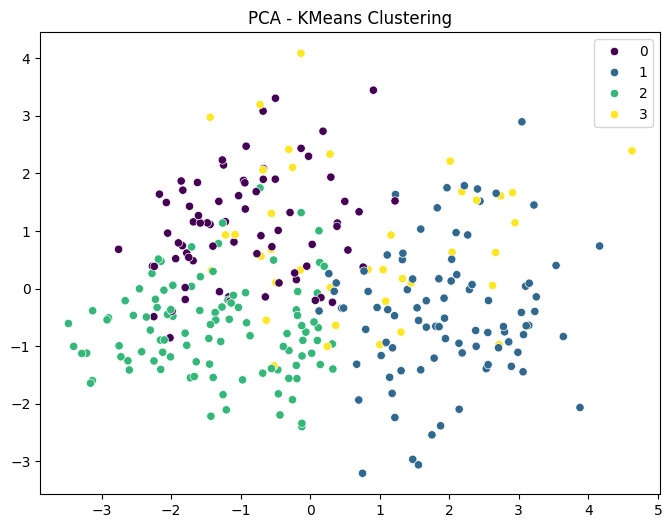

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans_labels, palette='viridis')
plt.title('PCA - KMeans Clustering')
plt.show()

# t-SNE visualization

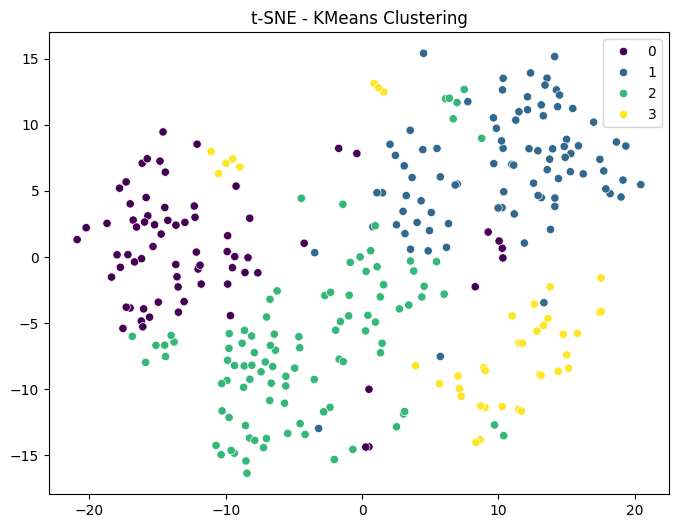

In [17]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_preprocessed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=kmeans_labels, palette='viridis')
plt.title('t-SNE - KMeans Clustering')
plt.show()

# Gaussian Mixture Model clustering

In [18]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_preprocessed)

# Silhouette score

In [19]:
print("Silhouette Score for K-means: ", silhouette_score(X_preprocessed, kmeans_labels))
print("Silhouette Score for Hierarchical: ", silhouette_score(X_preprocessed, hierarchical_labels))
try:
    print("Silhouette Score for DBSCAN: ", silhouette_score(X_preprocessed, dbscan_labels))
except ValueError as e:
    print("Silhouette Score for DBSCAN: Error -", e)
print("Silhouette Score for GMM: ", silhouette_score(X_preprocessed, gmm_labels))

Silhouette Score for K-means:  0.13335696483847778
Silhouette Score for Hierarchical:  0.11511622103926623
Silhouette Score for DBSCAN: Error - Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
Silhouette Score for GMM:  0.1081400500461008


# Davies-Bouldin index

In [22]:
print("Davies-Bouldin Index for K-means: ", davies_bouldin_score(X_preprocessed, kmeans_labels))
print("Davies-Bouldin Index for Hierarchical: ", davies_bouldin_score(X_preprocessed, hierarchical_labels))

Davies-Bouldin Index for K-means:  2.1222923727015943
Davies-Bouldin Index for Hierarchical:  2.168177899907483


# Check if DBSCAN

In [23]:
unique_dbscan_labels = len(set(dbscan_labels))
if unique_dbscan_labels > 1:
    print("Davies-Bouldin Index for DBSCAN: ", davies_bouldin_score(X_preprocessed, dbscan_labels))
else:
    print("Davies-Bouldin Index for DBSCAN: Not applicable (only one cluster or all noise)")

print("Davies-Bouldin Index for GMM: ", davies_bouldin_score(X_preprocessed, gmm_labels))

Davies-Bouldin Index for DBSCAN: Not applicable (only one cluster or all noise)
Davies-Bouldin Index for GMM:  2.3601840229795177
